In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df = df.drop(columns=['area_type', 'availability', 'society', 'balcony'], axis='columns')

In [5]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.shape

(13320, 5)

In [8]:
df = df.dropna()

In [9]:
df.shape

(13246, 5)

In [10]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [13]:
df['size'] = df['size'].apply(lambda x: x.split(' ')[1])

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,Bedroom,2600,5.0,120.00,4
2,Uttarahalli,BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,BHK,1521,3.0,95.00,3
4,Kothanur,BHK,1200,2.0,51.00,2


In [15]:
df['size'].value_counts()

size
BHK        10718
Bedroom     2515
RK            13
Name: count, dtype: int64

In [16]:
def convert_sqft_to_num(x):
    s = x.split('-')
    if len(s) == 2:
        num = (float(s[0]) + float(s[1])) / 2
        return num
    try:
        float(x)
    except:
        return None
    return float(x)

In [17]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [18]:
df['total_sqft'].head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [19]:
df['total_sqft'].isnull().sum()

46

In [20]:
df['price'].isnull().sum()

0

In [21]:
df['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13200 non-null  float64
dtypes: float64(1)
memory usage: 207.0 KB


In [22]:
df['price_per_sqft'] = df['price']/df['total_sqft']

In [23]:
df['price_per_sqft'] = df['price_per_sqft'] * 100000

In [24]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df.location = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats <= 10])

1052

In [27]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [29]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [31]:
df.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [32]:
df.location.sample(10)

11977         Tumkur Road
13299          Whitefield
9432           Chandapura
5344       Sarjapur  Road
2416               Anekal
7102          Uttarahalli
11967         Munnekollal
580             Gottigere
5488     Ramamurthy Nagar
7687          Uttarahalli
Name: location, dtype: object

In [33]:
df.shape

(13246, 7)

In [34]:
df = df[~(df.total_sqft/df.bhk < 300)]

In [35]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
import seaborn as sns

<Axes: xlabel='price_per_sqft', ylabel='Density'>

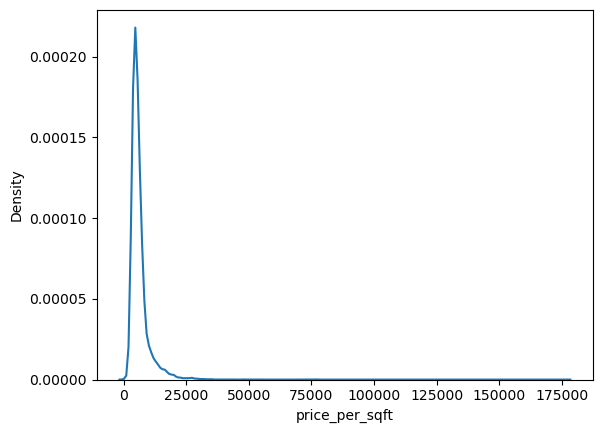

In [37]:
sns.kdeplot(df.price_per_sqft)

In [38]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft <= (m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out

In [39]:
df = remove_pps_outlier(df)

In [40]:
df.shape

(10241, 7)

<Axes: xlabel='price_per_sqft', ylabel='Density'>

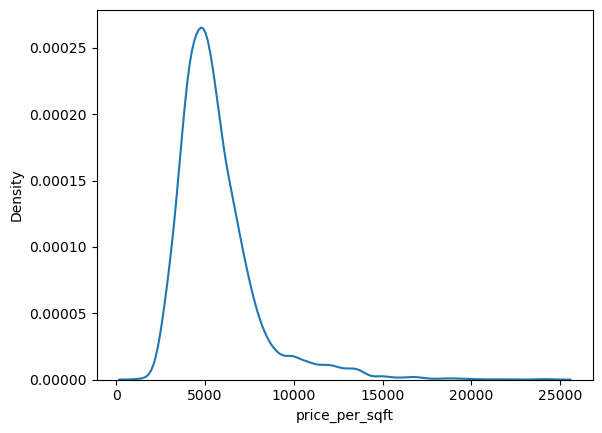

In [41]:
sns.kdeplot(df.price_per_sqft)

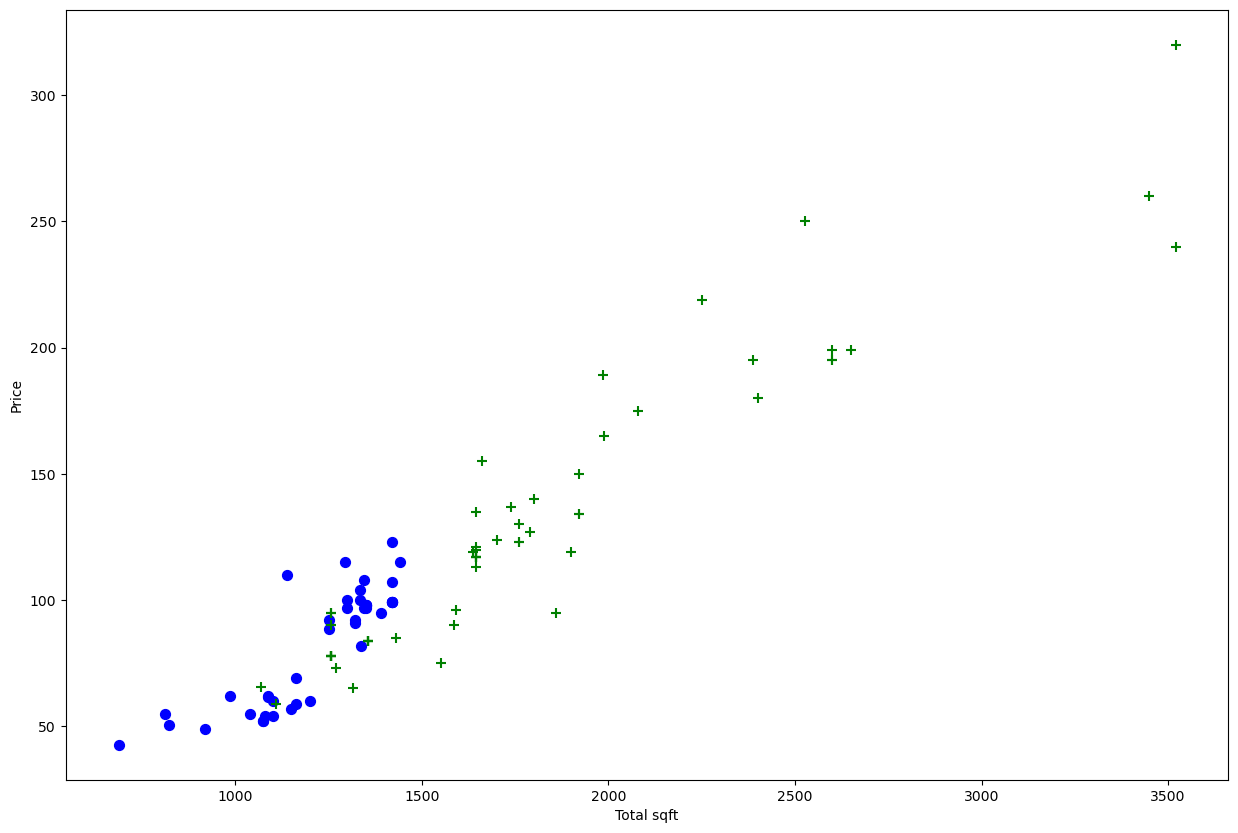

In [49]:
import matplotlib
def show_scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='bhk2', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='bhk3', s=50)
    plt.xlabel('Total sqft')
    plt.ylabel('Price')
    plt.show()
    
show_scatter_plot(df, 'Hebbal')